# Exercise sheet 1

## Task 1.1

a.) Prove that $R_Y(\theta)$ is unitary (i.e. $R_Y(\theta)^*R_Y(\theta)=I=R_Y(\theta)R_Y(\theta)^*$)

Proof: Since $R_Y(\theta)\in \mathbb R^{2\times 2}$ $R_Y(\theta)^*=R_Y(\theta)^{\top}$ and $\sin^2\theta+\cos^2\theta=1$
$$
\begin{align}
R_Y(\theta)^*R_Y(\theta)&=
\begin{pmatrix} 
    \cos \frac\theta2 & \sin \frac\theta2 \\ 
    -\sin \frac\theta2 & \cos \frac\theta2
\end{pmatrix} 
\begin{pmatrix} 
    \cos \frac\theta2 & -\sin \frac\theta2 \\ 
    \sin \frac\theta2 & \cos \frac\theta2
\end{pmatrix}\\
&=\begin{pmatrix} 
    \cos^2 \frac\theta2 + \sin^2 \frac\theta2 & -\cos \frac\theta2\sin \frac\theta2+\sin \frac\theta2\cos \frac\theta2 \\ 
    -\sin \frac\theta2\cos \frac\theta2+\cos \frac\theta2\sin \frac\theta2 & \sin^2 \frac\theta2 + \cos^2 \frac\theta2
\end{pmatrix} \\
&=\begin{pmatrix} 
    1 & 0 \\ 
    0 & 1
\end{pmatrix}=I \\
&=\begin{pmatrix} 
    \cos^2 \frac\theta2 + \sin^2 \frac\theta2 & \cos \frac\theta2\sin \frac\theta2-\sin \frac\theta2\cos \frac\theta2 \\ 
    \sin \frac\theta2\cos \frac\theta2-\cos \frac\theta2\sin \frac\theta2 & \sin^2 \frac\theta2 + \cos^2 \frac\theta2
\end{pmatrix} \\
&=\begin{pmatrix} 
    \cos \frac\theta2 & -\sin \frac\theta2 \\ 
    \sin \frac\theta2 & \cos \frac\theta2
\end{pmatrix} 
\begin{pmatrix} 
    \cos \frac\theta2 & \sin \frac\theta2 \\ 
    -\sin \frac\theta2 & \cos \frac\theta2
\end{pmatrix}
=R_Y(\theta)R_Y(\theta)^*
\end{align}
$$

b.) Prove that $R_Y(\frac\pi2)\left|0\right>=H\left|0\right>$

Proof: We first remark that $\cos\frac\pi4=\sin\frac\pi4=\frac{1}{\sqrt{2}}$. Thus
$$
\begin{align}
R_Y\left(\frac\pi2\right)\left|0\right>&=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & -1 \\
1 & 1
\end{pmatrix}
\begin{pmatrix}
1 \\
0
\end{pmatrix}
=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1
\end{pmatrix}
=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\begin{pmatrix}
1 \\
0
\end{pmatrix}
=H\left|0\right>
\end{align}
$$

c.) Does $R_Y(\frac\pi2)\left|1\right>=H\left|1\right>$ also hold?

Proof: No, since
$$
\begin{align}
R_Y\left(\frac\pi2\right)\left|1\right>&=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & -1 \\
1 & 1
\end{pmatrix}
\begin{pmatrix}
0 \\
1
\end{pmatrix}
=\frac{1}{\sqrt{2}}
\begin{pmatrix}
-1 \\
1
\end{pmatrix}
\neq \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-1
\end{pmatrix}
=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\begin{pmatrix}
0 \\
1
\end{pmatrix}
=H\left|1\right>
\end{align}
$$

d.) Evaluate $H^2$ and $R_Y^2(\frac\pi2)$

$$
\begin{align}
H^2&=\frac12
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
=\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}=I \\
R_Y^2\left(\frac\pi2\right)&=
\frac12
\begin{pmatrix}
1 & -1 \\
1 & 1
\end{pmatrix}
\begin{pmatrix}
1 & -1 \\
1 & 1
\end{pmatrix}
=\begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}\neq I
\end{align}
$$

e.) Are $R_Y(\frac\pi2)$ and $H$ involutory (self inverse)?

$R_Y(\frac\pi2)$ is not involutory, $H$ is.

## Task 1.2

a.) 

Standard imports

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import Aer, transpile
from qiskit.circuit.library.standard_gates import *
from qiskit.visualization import plot_histogram

Define helper function for running circuits with `aer_simulator`

In [2]:
simulator = Aer.get_backend('aer_simulator')
def run_circuit(circ, shots=10000):
    transp = transpile(circ, simulator)
    IBMjob = simulator.run(transp, shots=shots)
    result = IBMjob.result()
    counts_qiskit = result.get_counts(transp)
    counts = {}
    probs = {}
    for bitstring, value in counts_qiskit.items():
        new_bitstring = bitstring.replace(" ", "").replace("_", "")
        counts[new_bitstring] = value
        probs[new_bitstring] = value / shots
    return counts, probs

Set up quantum circuit

In [3]:
# set up registers and circuit
qreg_a = QuantumRegister(1, name='x') 
creg_a = ClassicalRegister(1, name='$c_x$')
qcirc_a = QuantumCircuit(qreg_a, creg_a, name='Quantum Patchinko')
# add RY-gate
qcirc_a.ry(np.pi / 2, qreg_a)
# measure
qcirc_a.measure(qreg_a, creg_a)

Draw circuit

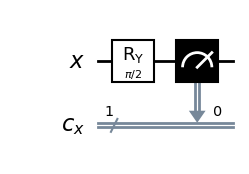

In [4]:
qcirc_a.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

Run the circuit

In [5]:
shots = 10_000
counts_a, probs_a = run_circuit(qcirc_a, shots=shots)
print(probs_a)

{'0': 0.4965, '1': 0.5035}


Visualize result

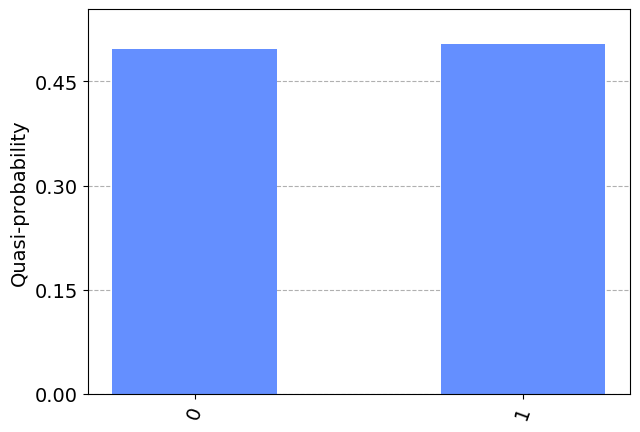

In [6]:
plot_histogram(probs_a, bar_labels=False)

We observe that states $\left|0\right>$ and $\left|1\right>$ are measured with the same probability

b.)

From the lecture, we know that the qubit will be measured in state $\left|1\right>$ with probability $\mu$ when
$$
\theta=2\arcsin\sqrt{\mu} \Leftrightarrow \mu=\sin^2 \frac\theta2
$$
Inserting $\theta=\frac\pi2$, we obtain $\mu=\sin^2 \frac\pi4=\frac12$

c.)

Implementing the circuit

In [7]:
# quantum registers
qreg_x = QuantumRegister(1, name='x')
qreg_y = QuantumRegister(1, name='y')
qreg_z = QuantumRegister(1, name='z')
# classical register
creg = ClassicalRegister(1, name='c')
# circuit
qcirc = QuantumCircuit(qreg_x, qreg_y, qreg_z, creg)


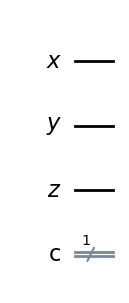

In [8]:
qcirc.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

In [9]:
# RY(pi/2)-gate on qubit x
qcirc.ry(np.pi / 2, qreg_x)
# RY(pi)-gate on qubit z conditioned on qubit x
qcirc.cry(np.pi, qreg_x, qreg_z)
# X-gate on qubit x
qcirc.x(qreg_x)
# RY(pi)-gate on qubit y conditioned on qubit x
qcirc.cry(np.pi, qreg_x, qreg_y)
# X-gate on qubit x
qcirc.x(qreg_x)

Add measurement on qubit y

In [10]:
qcirc_c = qcirc.copy()
qcirc_c.measure(qreg_y, creg)

Draw the circuit

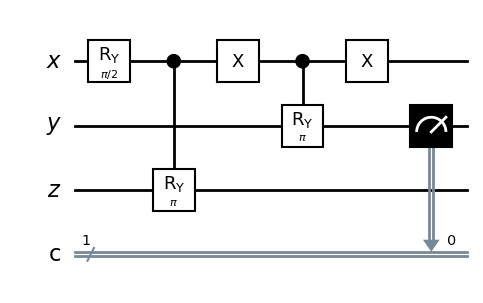

In [11]:
qcirc_c.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

Run the circuit

In [12]:
counts_c, probs_c = run_circuit(qcirc_c)

Visualize the result

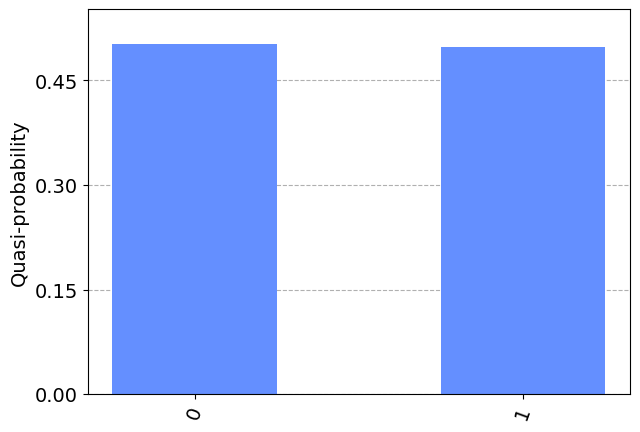

In [13]:
plot_histogram(probs_c, bar_labels=False)

Qubit y is measured in state $\left|0\right>$ with probability $\frac12$

d.) 

Add measurement on qubit z

In [14]:
qcirc_d = qcirc.copy()
qcirc_d.measure(qreg_z, creg)

Draw the circuit

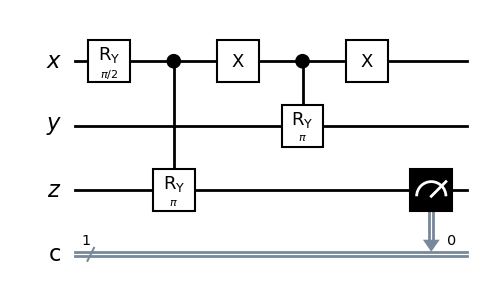

In [15]:
qcirc_d.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

Run the circuit

In [16]:
counts_d, probs_d = run_circuit(qcirc_d)

Plot the result

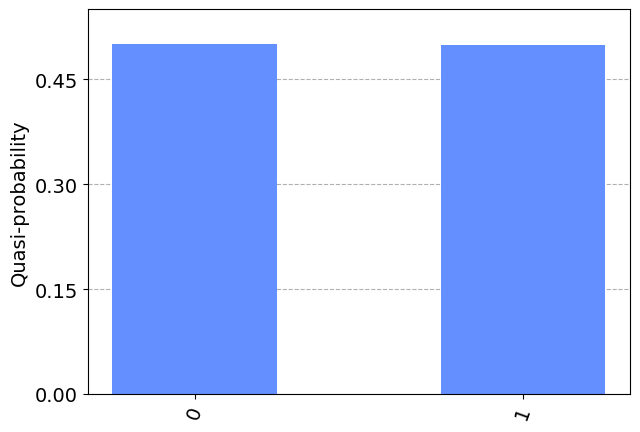

In [17]:
plot_histogram(probs_d, bar_labels=False)

Qubit z is measured in state $\left|0\right>$ with probability $\frac12$

## Task 1.3

a.) Estimate the probabilities $P(W_1)$, $P(W_2|W_1)$ and $P(W_3|W_2)$

The given training data is

In [18]:
texts = ['my dog barks', 'the dog barks', 'the dog sleeps', 
         'my cat sleeps', 'the cat sleeps']

We can count the occurences in the training set for estimating the probabilities
<table>
<tr><th> $$P(W_1)$$ </th><th> $$P(W_2\vert W_1)$$ </th><th> $$P(W_3\vert W_2)$$ </th></tr>
<tr><td>
    
|$$w_1$$|$$p(w_1)$$|
|:-:|:-:|
|my|2/5|
|the|3/5|
    
</td><td>
    
|$$w_2$$|$$w_1$$|$$p(w_2|w_1)$$|
|:-:|:-:|:-:|
|dog|my|1/2|
|dog|the|2/3|
|cat|my|1/2|
|cat|the|1/3|
    
</td><td>
    
|$$w_3$$|$$w_2$$|$$p(w_3|w_2)$$|
|:-:|:-:|:-:|
|barks|dog|2/3|
|barks|cat|0|
|sleeps|dog|1/3|
|sleeps|cat|1|
    
</td></tr> </table>

$$
\begin{align}
\sum_{w_1}\sum_{w_2}\sum_{w_3}p(w_1,w_2,w_3)
&=\sum_{w_1}\sum_{w_2}\sum_{w_3}p(w_3|w_2)p(w_2|w_1)p(w_1) \\
&=\sum_{w_1}p(w_1)\sum_{w_2}p(w_2|w_1)\sum_{w_3}p(w_3|w_2)=1
\end{align} 
$$

b.) 

Compute $p(\text{my}, \text{cat}, \text{barks})$

$$
p(\text{my}, \text{cat}, \text{barks})
=p(\text{barks}|\text{cat})p(\text{cat}|\text{my})p(\text{my})
=0\cdot \frac12\cdot \frac25=0
$$

Compute $p(\text{my}, \text{dog}, \text{sleeps})$

$$
p(\text{my}, \text{dog}, \text{sleeps})
=p(\text{sleeps}|\text{dog})p(\text{dog}|\text{my})p(\text{my})
=\frac13\cdot \frac12\cdot \frac25=\frac{1}{15}
$$

c.) Implement joint probability

We define two functions for converting between text and bitstring

In [19]:
def convert_to_bit_string(text):
    split = text.split(' ')
    bit_string = ''
    bit_string += '0' if split[2] == 'barks' else '1'
    bit_string += '0' if split[1] == 'dog' else '1'
    bit_string += '0' if split[0] == 'my' else '1'
    return bit_string

def convert_to_text(bit_string):
    text = ''
    text += 'my' if bit_string[2] == '0' else 'the'
    text += ' '
    text += 'dog' if bit_string[1] == '0' else 'cat'
    text += ' '
    text += 'barks' if bit_string[0] == '0' else 'sleeps'
    return text

Convert our list of texts to a list of bitstrings

In [20]:
bit_strings = [convert_to_bit_string(text) for text in texts]
print(bit_strings)

['000', '001', '101', '110', '111']


To compute probabilities $p(w_1)$, $p(w_2|w_1)$ and $p(w_3|w_2)$ we first count the occurences

In [21]:
# my ≙ 0, the ≙ 1
pX = {'0': 0, '1': 0}
# my dog ≙ 00, the dog ≙ 01, my cat ≙ 10, the cat ≙ 11
pYcX = {'00': 0, '01': 0, '10': 0, '11': 0}
# dog barks ≙ 00, cat barks ≙ 01, dog sleeps ≙ 10, cat sleeps ≙ 11
pZcY = {'00': 0, '01': 0, '10': 0, '11': 0}

for bit_string in bit_strings:
    pX[bit_string[2]] += 1
    pYcX[bit_string[1:]] += 1
    pZcY[bit_string[:2]] += 1

Normalize to obtain probabilities

In [22]:
countsX, countsYcX0, countsYcX1, countsZcY0, countsZcY1 = 0, 0, 0, 0, 0
# compute conditional counts
for bit_string in pYcX.keys():
    if bit_string[1] == '0':
        countsX += pX[bit_string[0]]
        countsYcX0 += pYcX[bit_string]
        countsZcY0 += pZcY[bit_string] 
    else:
        countsYcX1 += pYcX[bit_string]
        countsZcY1 += pZcY[bit_string]
for bit_string in pYcX.keys():
    if bit_string[1] == '0':
        pX[bit_string[0]] /= countsX
        pYcX[bit_string] /= countsYcX0
        pZcY[bit_string] /= countsZcY0
    else:
        pYcX[bit_string] /= countsYcX1
        pZcY[bit_string] /= countsZcY1
print(pX)
print(pYcX)
print(pZcY)

{'0': 0.4, '1': 0.6}
{'00': 0.5, '01': 0.6666666666666666, '10': 0.5, '11': 0.3333333333333333}
{'00': 0.6666666666666666, '01': 0.0, '10': 0.3333333333333333, '11': 1.0}


Computing the joint probabilities

In [23]:
pXYZ = {}
for w1 in ['my', 'the']:
    for w2 in ['dog', 'cat']:
        for w3 in ['barks', 'sleeps']:
            text = w1 + ' ' + w2 + ' ' + w3
            bit_string = convert_to_bit_string(text)
            pXYZ[bit_string] = pZcY[bit_string[:2]] * pYcX[bit_string[1:]] * pX[bit_string[2]]
            print(text, bit_string, pXYZ[bit_string])

my dog barks 000 0.13333333333333333
my dog sleeps 100 0.06666666666666667
my cat barks 010 0.0
my cat sleeps 110 0.2
the dog barks 001 0.26666666666666666
the dog sleeps 101 0.13333333333333333
the cat barks 011 0.0
the cat sleeps 111 0.19999999999999998


d.) Write down corresponding joint probabilitiy

$$
p(w_1,w_2,w_3)=p(w_3|w_1,w_2)p(w_2|w_1)p(w_1)
$$

e.) Find a quantum circuit that computes the language model

Moving to the quantum realm, we first need some standard imports

In [24]:
import numpy as np
from qiskit import Aer, transpile
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.visualization import plot_histogram

Compute the rotation angles for the $R_Y$-gates

In [25]:
thtX1 = 2 * np.arcsin(np.sqrt(pX['1']))
thtY1X1 = 2 * np.arcsin(np.sqrt(pYcX['11']))
thtY1X0 = 2 * np.arcsin(np.sqrt(pYcX['10']))
# p(Z|X,Y)=p(Z|Y)
thtZ1Y1X1 = 2 * np.arcsin(np.sqrt(pZcY['11']))
thtZ1Y1X0 = 2 * np.arcsin(np.sqrt(pZcY['11']))
thtZ1Y0X1 = 2 * np.arcsin(np.sqrt(pZcY['10']))
thtZ1Y0X0 = 2 * np.arcsin(np.sqrt(pZcY['10']))

Define 3 quantum registers and 3 classical registers

In [26]:
# define 3 qubits / qubit registers
qregX = QuantumRegister(1, name='x')
qregY = QuantumRegister(1, name='y')
qregZ = QuantumRegister(1, name='z')
# define 3 bits / classical registers
cregX = ClassicalRegister(1, name='$c_x$')
cregY = ClassicalRegister(1, name='$c_y$')
cregZ = ClassicalRegister(1, name='$c_z$')

Set up quantum circuit for quantum Baysian network

In [27]:
qcirc = QuantumCircuit(qregX, qregY, qregZ, cregX, cregY, cregZ, name='Bayes net')

# step 1
qcirc.ry(thtX1, qregX) # an R_Y gate
qcirc.cry(thtY1X1, control_qubit=qregX, target_qubit=qregY) # a controlled R_Y gate
qcirc.mcry(thtZ1Y1X1,[qregX[0], qregY[0]], qregZ[0]) # a multiple controlled R_Y gate
# step 2
qcirc.x(qregX)
qcirc.cry(thtY1X0, control_qubit=qregX, target_qubit=qregY)
qcirc.mcry(thtZ1Y1X0,[qregX[0], qregY[0]], qregZ[0])
qcirc.x(qregX)
# step 3
qcirc.x(qregY)
qcirc.mcry(thtZ1Y0X1,[qregX[0], qregY[0]], qregZ[0])
qcirc.x(qregY)
# step 4
qcirc.x(qregX)
qcirc.x(qregY)
qcirc.mcry(thtZ1Y0X0,[qregX[0], qregY[0]], qregZ[0])
qcirc.x(qregY)
qcirc.x(qregX)

qcirc.measure([qregX[0], qregY[0], qregZ[0]], [cregX[0], cregY[0], cregZ[0]])

Draw the circuit

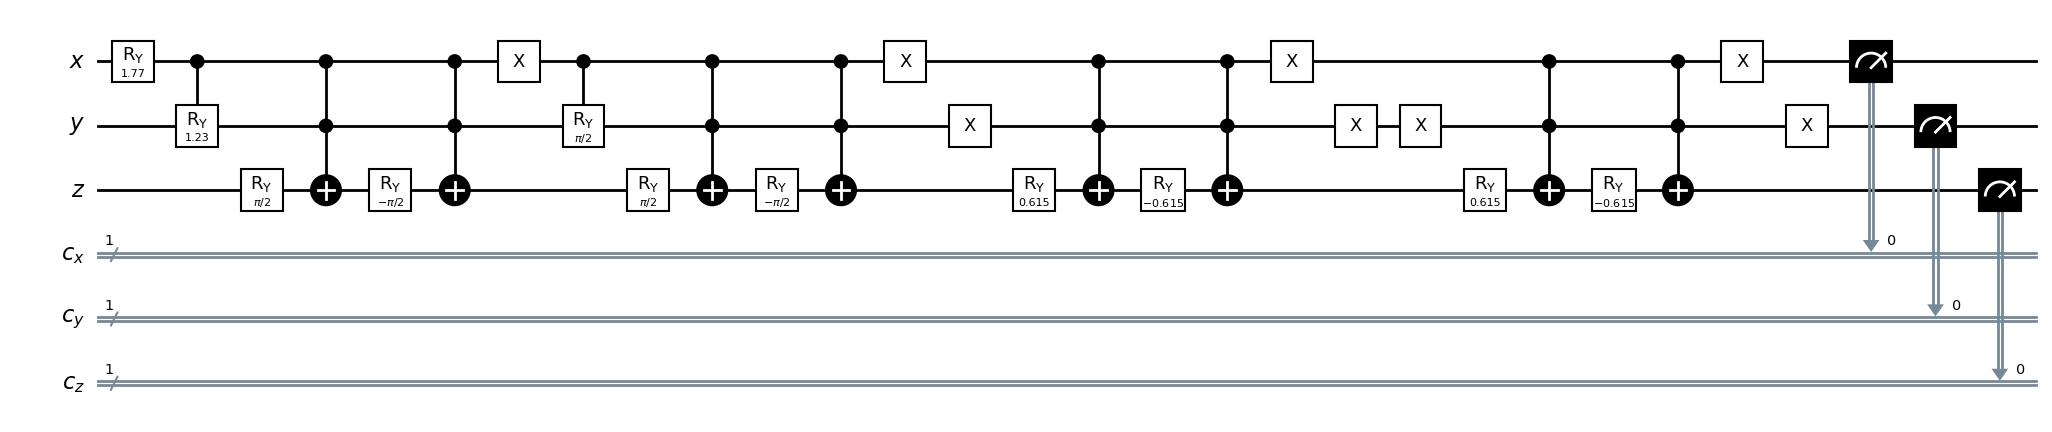

In [28]:
qcirc.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

Define convenience function for running circuits with the `aer_simulator`

In [29]:
simulator = Aer.get_backend('aer_simulator')
def runCircuit(circ, shots=10000):
    transp = transpile(circ, simulator)
    IBMjob = simulator.run(transp, shots=shots)
    result = IBMjob.result()
    counts = result.get_counts(transp)
    counts_new = {}
    for bitstring, value in counts.items():
        new_bitstring = bitstring.replace(" ", "").replace("_", "")
        counts_new[new_bitstring] = value
    return counts_new

Compute counts of quantum Bayesian network

In [30]:
qpXYZ = runCircuit(qcirc)
print(qpXYZ)

{'000': 1338, '111': 1940, '101': 1281, '110': 2039, '001': 2759, '100': 643}


Compare to classical computation

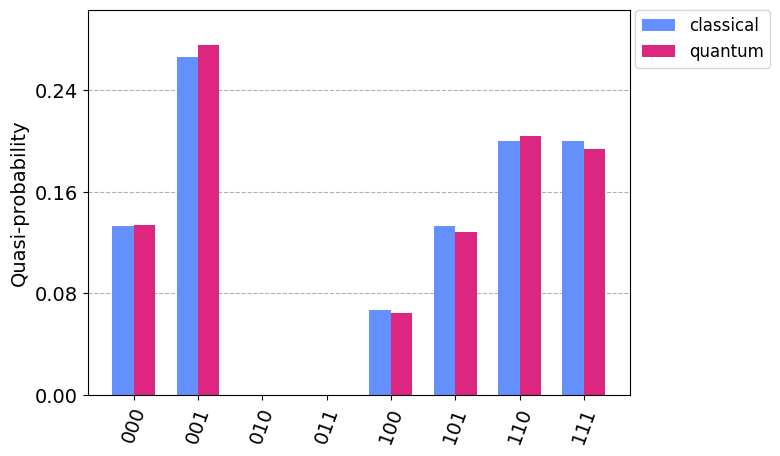

In [31]:
plot_histogram([pXYZ, qpXYZ], legend=['classical', 'quantum'], bar_labels=False)